# Big Data y Machine Learning (UBA) 2025
## Clase 5 - Usando APIS (Parte 2)

- Conocer qué son y cómo trabajar con APIs

¿Qué es una API? Los sistemas tienen distintos tipos de interfaces que permiten interactuar con ellos.

* **GUI (Graphical User Interface o interfaz gráfica)**: El usuario clickea e interactúa con distintos objetos para ejecutar acciones y lograr sus objetivos. Las páginas web tienen interfaces gráficas.
* **API (Application Programming Interface o interfaz de programación)**: El usuario escribe líneas de código para interactuar con el sistema, ejecutar acciones y lograr sus objetivos.

Todos los sitios web tienen una interfaz gráfica con la que estamos acostumbrados a interactuar, y también tienen una interfaz de programación más o menos desarrollada, o más o menos expuesta, con la cual tal vez no estemos tan acostumbrados a interactuar.

Ejemplo:

En https://www.mercadolibre.com.ar/ podemos buscar en el buscador "pelotas", apretar "Enter" y el sistema devuelve el resultado de una búsqueda. Si, en cambio, ponemos por "pelotas futbol" y apretamos "Enter" de nuevo, cambiará el resultado de la búsqueda. Esta es la **interfaz gráfica del sitio**.

Sin embargo, también podríamos lograr el mismo objetivo sólo escribiendo distintas URLs en el navegador:

* https://listado.mercadolibre.com.ar/pelotas
* https://listado.mercadolibre.com.ar/pelotas-futbol

Esto es más parecido a lo que llamaríamos una **interfaz de programación**.


Las APIs son mecanismos que permiten que una aplicación o servicio acceda a un recurso en otra aplicación o servicio (un cliente accede a recurso en un servidor).

En la web, las interfaces de programación de uso más difundido son las APIs REST ([Representational state transfer](https://es.wikipedia.org/wiki/Transferencia_de_Estado_Representacional)). REST es un estilo para diseñar aplicaciones que especifica un conjunto de protocolos y métodos para interactuar con los recursos de internet escribiendo líneas de código.

Estas APIs se comunican mediante el protocolo HTTP para interactuar con los recursos (es el medio de comunicación comunicación entre el usuario y el servidor). HTTP es el mismo protocolo que se utiliza para cargar páginas web en un navegador.
Este protocolo indica cómo estructurar un mensaje de texto que describa la petición (**request**) del usuario o cliente a un servidor. Hay distintos tipos de peticiones que un usuario puede realizar, algunas de ellas son:

* **POST**: Envía datos al servidor para crear un recurso nuevo.
* **GET**: Se utiliza para obtener información de un recurso alojado en el servidor.
* **PUT**: Actualiza (crea o modifica) un recurso del servidor.
* **DELETE**: Elimina un recurso del servidor.

El cliente manda una petición (**request**) y el servidor devuelve una respuesta (**response**).

<font color="gray">
Fuente: Curso de Instituto Humai - APIs
<font>

Cada vez que vamos al navegador y escribimos la dirección de una página web, **estamos haciendo un GET request** a un servidor. Esto es una petición para adquirir el código de un recurso que queremos visualizar en el navegador.

La URL es la parte más importante de la definición de un GET request (aunque el navegador agrega otras cosas también, que no vemos) y nos permite cambiar la representación deseada de un mismo recurso de distintas maneras:

* https://deportes.mercadolibre.com.ar/pelotas-futbol pide al servidor pelotas de fútbol.
* https://deportes.mercadolibre.com.ar/pelotas-futbol_OrderId_PRICE pide al servidor pelotas de fútbol ordenadas por precio.

Cuando escribimos una URL en un navegador, la mayoría de las veces hacemos GET requests que devuelven código HTML (el código que da una estructura a una página web, tal como vimos en el video anterior cuando obteníamos el código HTML al hacer web scraping). Pero los GET requests pueden devolver datos en otros formatos (por ejemplo en JSON y en CSV).

Las APIs REST que definen GET requests capaces de devolver datos en formato JSON y CSV, son particularmente útiles cuando queremos analizar datos.

Ahora vamos a conocer algunas APIs.

### API World Bank

Pueden ver la documentación [acá](https://wbdata.readthedocs.io/en/stable/)

In [8]:
import sys
!{sys.executable} -m pip install wbdata # a mi esta linea me anda bien para installar el nuevo paquete "wbdata". Este es una wrapper de para usar la API del Banco Mundial (World Bank)

"C:\Users\El" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [9]:
#!pip install wbdata
import wbdata
import pandas as pd

In [10]:
help(wbdata)

Help on package wbdata:

NAME
    wbdata - wbdata: A wrapper for the World Bank API

PACKAGE CONTENTS
    cache
    client
    dates
    fetcher

FUNCTIONS
    get_default_client() -> wbdata.client.Client
        Get the default client

VERSION
    1.0.0

FILE
    c:\users\el economista\anaconda3\lib\site-packages\wbdata\__init__.py




In [11]:
indicadores = {'HD.HCI.HLOS.FE':'scores_edu_fem','HD.HCI.HLOS.MA':'scores_edu_masc'}
#HD.HCI.HLOS.FE                   Harmonized Test Scores, Female
#HD.HCI.HLOS.MA                   Harmonized Test Scores, Male

data = wbdata.get_dataframe(indicadores, country=['USA','ARG'])

df = pd.DataFrame(data=data)

In [12]:
df.head()

scores_edu_fem  scores_edu_masc
country   date                                 
Argentina 2020      406.452667       409.942383
          2019             NaN              NaN
          2018      420.933350       427.109039
          2017      421.000000       427.000000
          2016             NaN              NaN

In [13]:
df

scores_edu_fem  scores_edu_masc
country       date                                 
Argentina     2020      406.452667       409.942383
              2019             NaN              NaN
              2018      420.933350       427.109039
              2017      421.000000       427.000000
              2016             NaN              NaN
              2015             NaN              NaN
              2014             NaN              NaN
              2013             NaN              NaN
              2012             NaN              NaN
              2011             NaN              NaN
              2010      414.181763       402.934509
United States 2020      514.136536       509.559448
              2019             NaN              NaN
              2018      523.395203       521.843384
              2017      523.000000       522.000000
              2016             NaN              NaN
              2015             NaN              NaN
              2014             NaN              NaN
              2013             NaN              NaN
              2012             NaN              NaN
              2011             NaN              NaN
              2010      511.146606       514.809570

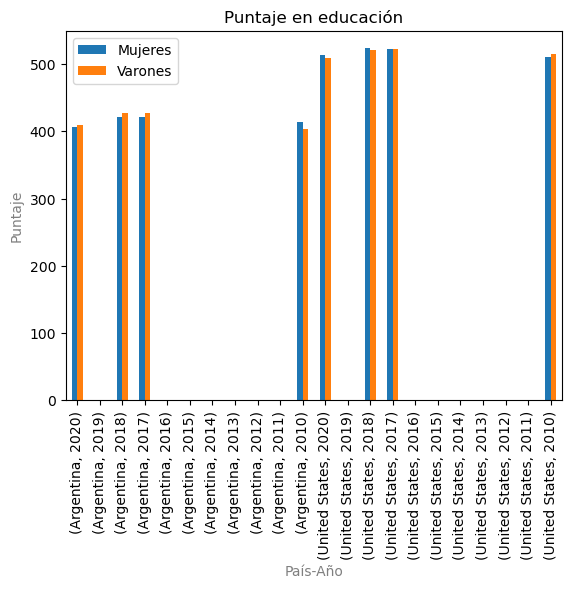

In [14]:
ax = df.plot(kind='bar', title='Puntaje en educación')
ax.set_xlabel('País-Año',color='grey')
ax.set_ylabel('Puntaje',color='grey')
ax.legend(["Mujeres","Varones"])
# Acá estamos usando el index del df como xticklabels

Ahora buscamos hacer un gráfico solo con datos del año 2020

In [15]:
# Dejamos índice como columnas
df.reset_index(inplace=True)
df

,country,date,scores_edu_fem,scores_edu_masc
0,Argentina,2020,406.452667,409.942383
1,Argentina,2019,NaN,NaN
2,Argentina,2018,420.933350,427.109039
3,Argentina,2017,421.000000,427.000000
4,Argentina,2016,NaN,NaN
5,Argentina,2015,NaN,NaN
6,Argentina,2014,NaN,NaN
7,Argentina,2013,NaN,NaN
8,Argentina,2012,NaN,NaN
9,Argentina,2011,NaN,NaN


In [16]:
print(df["date"].dtype) # no es numérica
df_2020 = df[df["date"]=="2020"]
df_2020

object


,country,date,scores_edu_fem,scores_edu_masc
0,Argentina,2020,406.452667,409.942383
11,United States,2020,514.136536,509.559448


In [17]:
df_2020 = df_2020.set_index(["country", "date"])
df_2020

,,scores_edu_fem,scores_edu_masc
country,date,,
Argentina,2020,406.452667,409.942383
United States,2020,514.136536,509.559448


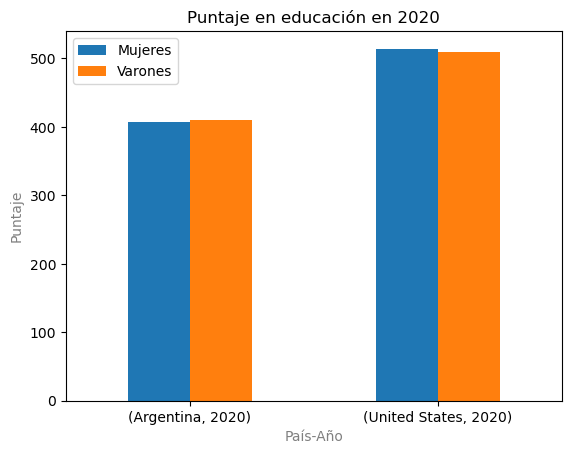

In [18]:
# Graficamos
ax = df_2020.plot(kind='bar', title='Puntaje en educación en 2020')
ax.set_xlabel('País-Año',color='grey')
ax.set_ylabel('Puntaje',color='grey')
ax.tick_params(axis="x", rotation=0)
ax.legend(["Mujeres","Varones"])

### API Series de Tiempo

La **[API Series de Tiempo de la Republica Argentina](https://apis.datos.gob.ar/series)** es una API REST desarrollada y mantenida por el Estado Nacional de Argentina para la consulta de estadísticas en formato de series de tiempo. Contiene series publicadas por organismos de la Administración Pública Nacional.

La API permite:

* [Buscar series](https://datosgobar.github.io/series-tiempo-ar-api/reference/search-reference/) por texto. También se pueden buscar en el sitio web de datos.gob.ar: https://datos.gob.ar/series
* Cambiar la frecuencia (por ejemplo: convertir series diarias en mensuales)
* Elegir la función de agregacion de valores, usada en el cambio de frecuencia (una serie se puede convertir de diaria a mensual promediando, sumando, sacando el maximo, el minimo, el ultimo valor del periodo, etc)
* Filtrar por rango de fechas
* Elegir el formato (CSV o JSON)
* Cambiar configuracion del CSV (caracter separador, caracter decimal)

En https://datos.gob.ar/series podés buscar series de tiempo publicadas por distintos organismos de la Administración Pública Nacional en Argentina y usar el link al CSV para leerlos directamente desde python con pandas.

También podes **buscar los ids de las series de interés** y juntarlos en la misma consulta para armar una tabla de hasta 40 series.

In [19]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# Un ejemplo

url_arg = "https://apis.datos.gob.ar/series/api/series?ids=105.1_I2N_2016_M_16,105.1_I2L_2016_M_14,105.1_I2L_2016_M_16&format=json"

response = requests.get(url_arg)
print(response)

datos = response.json()
datos

<Response [200]>


{'data': [['2016-04-01', 23.2, 20.96, 31.32],
  ['2016-05-01', 14.94, 19.56, 32.94],
  ['2016-06-01', 12.0, 18.82, 36.0],
  ['2016-07-01', 11.53, 17.31, 41.03],
  ['2016-08-01', 11.57, 17.46, 37.04],
  ['2016-09-01', 11.71, 20.11, 26.75],
  ['2016-10-01', 11.7, 26.76, 25.52],
  ['2016-11-01', 11.72, 35.39, 30.07],
  ['2016-12-01', 11.79, 41.54, 29.85],
  ['2017-01-01', 12.26, 49.87, 37.18],
  ['2017-02-01', 12.34, 55.02, 44.08],
  ['2017-03-01', 12.76, 37.99, 48.56],
  ['2017-04-01', 13.73, 29.64, 42.24],
  ['2017-05-01', 14.99, 26.5, 35.2],
  ['2017-06-01', 14.35, 23.85, 38.07],
  ['2017-07-01', 13.89, 22.83, 42.24],
  ['2017-08-01', 14.0, 23.59, 49.69],
  ['2017-09-01', 14.36, 25.8, 43.41],
  ['2017-10-01', 14.64, 30.05, 38.81],
  ['2017-11-01', 14.79, 38.06, 35.01],
  ['2017-12-01', 15.94, 37.67, 37.8],
  ['2018-01-01', 20.61, 38.73, 41.57],
  ['2018-02-01', 29.26, 41.52, 47.69],
  ['2018-03-01', 33.74, 36.49, 41.87],
  ['2018-04-01', 33.29, 33.17, 40.99],
  ['2018-05-01', 29.3, 30.

In [21]:
d  = datos['data']
data_arg = pd.DataFrame(d)
data_arg.columns = ['fecha', 'IPC Limon', 'IPC Naranja', 'IPC Lechuga']

In [22]:
data_arg

,fecha,IPC Limon,IPC Naranja,IPC Lechuga
0,2016-04-01,23.20,20.96,31.32
1,2016-05-01,14.94,19.56,32.94
2,2016-06-01,12.00,18.82,36.00
3,2016-07-01,11.53,17.31,41.03
4,2016-08-01,11.57,17.46,37.04
...,...,...,...,...
95,2024-03-01,1494.20,843.00,3838.60
96,2024-04-01,1656.48,847.70,2815.94
97,2024-05-01,1091.94,804.16,3430.29
98,2024-06-01,890.09,748.37,3523.89


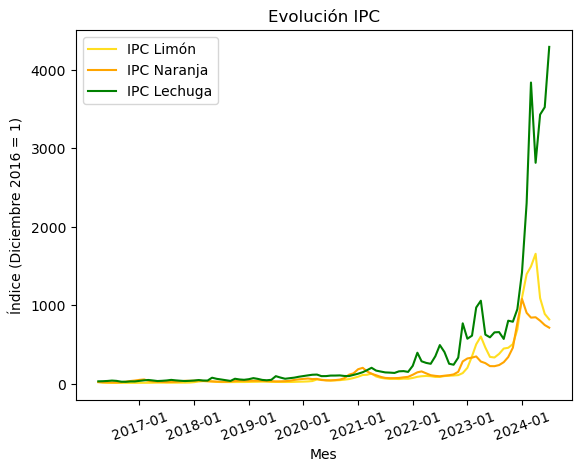

In [23]:
data_arg['fecha'] = pd.to_datetime(data_arg['fecha'])

# Creamos la figura y los axes
fig, ax = plt.subplots()  # Crear objetos

# Definimos series
ax.plot(data_arg['fecha'], data_arg['IPC Limon'], label="IPC Limón", color = '#FFDE21')  
ax.plot(data_arg['fecha'], data_arg['IPC Naranja'], label="IPC Naranja", color ='orange')  
ax.plot(data_arg['fecha'], data_arg['IPC Lechuga'], label="IPC Lechuga", color = 'green')

# Modificamos labels y título
ax.set_xlabel("Mes")
ax.set_ylabel("Índice (Diciembre 2016 = 1)")
ax.set_title("Evolución IPC")

# Configuramos las etiquetas del eje X para que solo muestren los meses de enero
data_arg_january = data_arg[data_arg['fecha'].dt.month == 1]  # Filtramos solo los meses de enero
ax.set_xticks(data_arg_january['fecha'])  # Establecemos los ticks solo en enero
ax.set_xticklabels(data_arg_january['fecha'].dt.strftime('%Y-%m'))  # Mostramos solo el año y mes en formato 'YYYY-MM'
plt.xticks(rotation=20)

# Agregamos leyenda
ax.legend()

# Mostramos la figura
plt.show()